## Trabajo Semanal 1 - BETTIG
### Primeros pasos en la simulación

El objetivo del trabajo es programar una función que genere señales senoidales y que permita parametrizar:
 - La amplitud máxima de la senoidal (volts)
 - Su valor medio (volts)
 - La frecuencia (Hz)
 - La fase (radianes)
 - La cantidad de muestras digitalizada por el ADC (# muestras)
 - La frecuencia de muestreo del ADC.

La llamada a la función deberá tener el siguiente formato:

>tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

### Desarrollo del Trabajo

En la primer parte del trabajo, se realizará la función que permite crear el vector de puntos que representará la señal senoidal y luego se mostrarán algunos ejemplos de aplicación

In [1]:
# Se importan las bibliotecas para realizar operaciones matemáticas 
# no standard (numpy) y la biblioteca que permite imprimir gráficos en 
# pantalla (matplotlib)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Voy a pasar a definir la función que utilizaré para realizar la señal 
# senoidal
def sin_gen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    # Lo primero que hay que hacer es crear un vector temporal que determinará
    # el inicio y el fin de la señal
    ts = 1/fs   # Tiempos de muestreo, intervalo de tiempo en el que se  
                # tomarán las muestras
    tf = N * ts # Tiempo final de la señal
    tt = np.arange(0, tf, ts) # Creo el vector temporal
    ##
    # Ahora tengo que generar mi señal senoidal, para eso voy a aprovechar
    # la función np.sin de la biblioteca numpy. Para ello, debemo evaluar
    # dicha función en cada uno de los puntos del vector temporal creado
    # previamente
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    ##
    # Devuelvo el vector temporal y el valor de la señal en cada uno de esos
    # puntos
    return tt, xx

#### Ejemplo 1
Voy a proponer una frecuencia de muestreo de 10Hz para recuperar una señal de 2Hz, estaría cumpliendo el teorema de nyquist sin problemas, ya que mi frecuencia de muestreo es 5 veces mas que la máxima frecuencia de la señal, por lo que (según la teoría) podré recuperar la señal. <br> Observemos como es la representación temporal de la misma en este caso:

In [3]:
# Se definen la frecuencia de muestro y la cantidad de muestras. 
# En este caso tendremos estaremos trabajando de forma normalizada, por
# lo que N = fs

fs = 10   # Frecuencia de muestreo
N = fs      # Cantidad de muestras

Text(0, 0.5, 'Amplitud [V]')

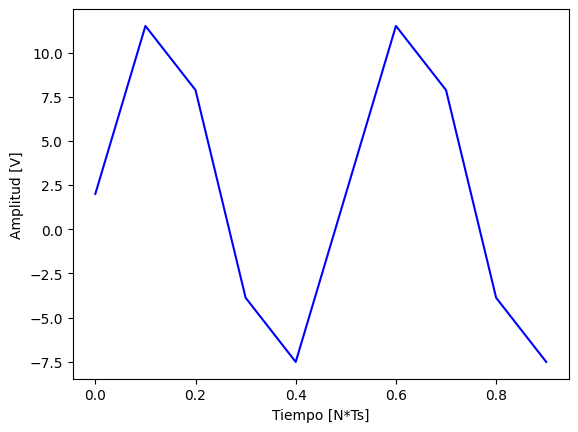

In [4]:
# Utilizo subplot para poder imprimir ambas señales en un mismo gráfico
# Posiciono la señal senoidal en el recuadro superior
t, y = sin_gen(10, 2, 2, 0, N, fs) # sin_gen(vmax, dc, frec, ph, N, fs)
plt.plot(t, y, color = 'blue')
plt.xlabel("Tiempo [N*Ts]")
plt.ylabel("Amplitud [V]")

#### Ejemplo 2
Manteniendo la frecuencia de la señal, aumentaré 10 veces la frecuencia de muestreo, llevandola a 30Hz. 
<br>En este caso, la representación de la señal es la siguiente:

In [5]:
# Se definen la frecuencia de muestro y la cantidad de muestras. 
# En este caso tendremos estaremos trabajando de forma normalizada, por
# lo que N = fs

fs = 100     # Frecuencia de muestreo
N = fs      # Cantidad de muestras

Text(0, 0.5, 'Amplitud [V]')

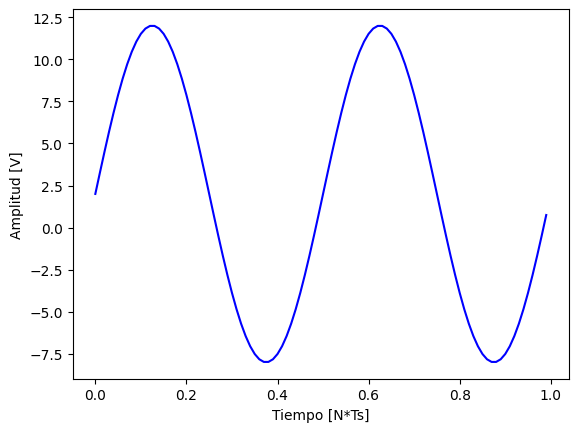

In [6]:
# Utilizo subplot para poder imprimir ambas señales en un mismo gráfico
# Posiciono la señal senoidal en el recuadro superior
t, y = sin_gen(10, 2, 2, 0, N, fs) # sin_gen(vmax, dc, frec, ph, N, fs)
plt.plot(t, y, color = 'blue')
plt.xlabel("Tiempo [N*Ts]")
plt.ylabel("Amplitud [V]")

Para la segunda parte, decidí realizar un generador de señales triangulares. Para ello, aproveché la biblioteca scipy que ya tenía una función para ello, de utilización muy similar a lo que es "sin" de la biblioteca numpy.
<br>Por ende, lo primero que debo hacer es incluirla al proyecto:

In [7]:
# Para la segunda parte del trabajo, importaré la biblioteca signal, que me
# permitirá utilizar la función sawtooth para generar mi señal triangular
from scipy import signal as sg

In [8]:
def triangle_gen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000, sl = 0.5):
    # Lo primero que hay que hacer es crear un vector temporal que determinará
    # el inicio y el fin de la señal
    ts = 1/fs   # Tiempos de muestreo, intervalo de tiempo en el que se  
                # tomarán las muestras
    tf = N * ts # Tiempo final de la señal
    tt = np.arange(0, tf, ts) # Creo el vector temporal
    # Ahora tengo que generar mi señal triangular, para eso voy a aprovechar
    # la función sg.sawtooth de la biblioteca signal. Para ello, debemo evaluar
    # dicha función en cada uno de los puntos del vector temporal creado
    # previamente
    xx = vmax * sg.sawtooth(2 * np.pi * ff * tt + ph, sl) + dc
    ##
    # Devuelvo el vector temporal y el valor de la señal en cada uno de esos
    # puntos
    return tt, xx

Quedó demostrado la importancia de la frecuencia de muestreo en los ejemplos anteriores, por lo que no tendría sentido repetir la experiencia con esta señal. Simplemente mostraré como es el resultado al utilizar la función correctamente:

Text(0.5, 0, 'Tiempo[N*ts]')

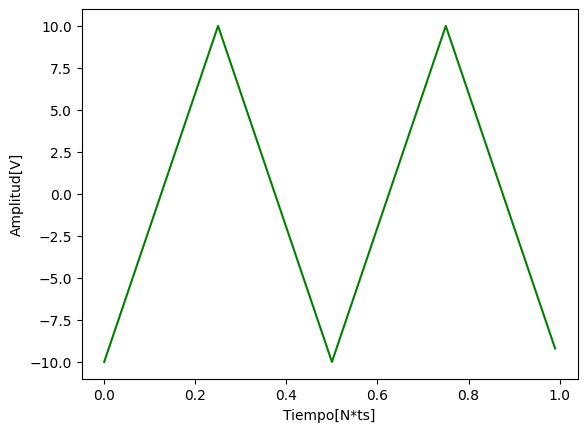

In [9]:
# Se definen la frecuencia de muestro y la cantidad de muestras. 
fs = 100    # Frecuencia de muestreo
N = fs      # Cantidad de muestras

# Posiciono la señal triangular en el recuadro inferior
t, y = triangle_gen(10, 0, 2, 0, N, fs)
plt.plot(t, y, color = 'green')
plt.ylabel("Amplitud[V]")
plt.xlabel("Tiempo[N*ts]")